Question: Which tumor characteristics are the most significant predictors of breast cancer malignancy

# Understanding Dataset

**1 Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
%matplotlib inline

**2. Import and Read Dataset**

In [2]:
from google.colab import files

uploaded= files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


In [4]:
import pandas as pd
import io

df=pd.read_csv(io.BytesIO(uploaded['Breast_cancer_data.csv']))
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
# Print the first 10 rows of the dataset
df.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [6]:
df.shape

(569, 6)

In [7]:
# Print the last 10 rows of dataset

df.tail(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
559,11.51,23.93,74.52,403.5,0.09261,1
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1
562,15.22,30.62,103.40,716.9,0.10480,0
563,20.92,25.09,143.00,1347.0,0.10990,0
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
# Checking for missing value

df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


**3. Visulaising the Dataset**



In [10]:
# Statistical measures about the data
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [11]:
df.columns


Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [13]:
# Checking the distrbution of the diagnosis variable
df["diagnosis"].value_counts()

,count
diagnosis,
1,357
0,212


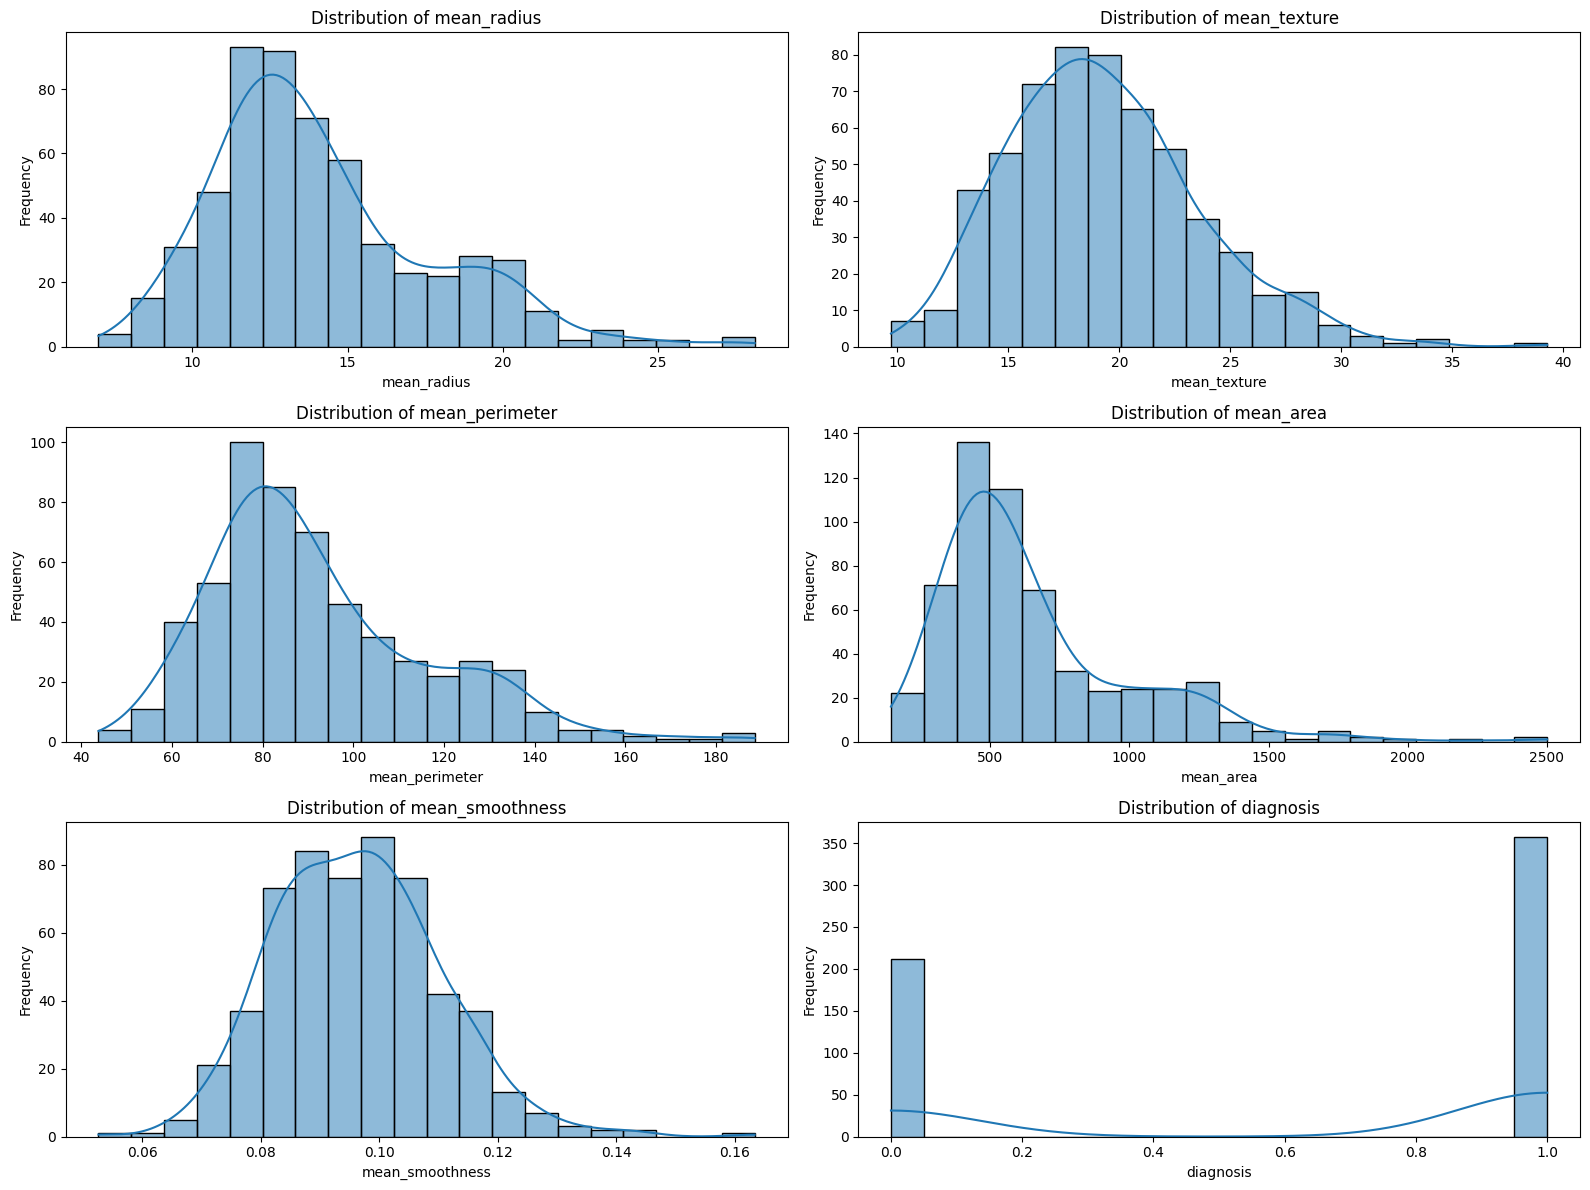

In [ ]:
# List of column to create histograms for
columns_to_plot= df.columns

# Set up the matplotlib figure size
plt.figure(figsize=(16,12), facecolor='w')

# Iterate through each variable
for i, column in enumerate(columns_to_plot): #loops through each column along with index i
    plt.subplot(3, 2, i+1)  # Adjust the subplot layout based on the number of variables
    if df[column].dtype == 'object': #check if column in catagorical
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    else:
        sns.histplot(df[column], bins=20, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

plt.tight_layout()#adjust space between subplots
plt.show()


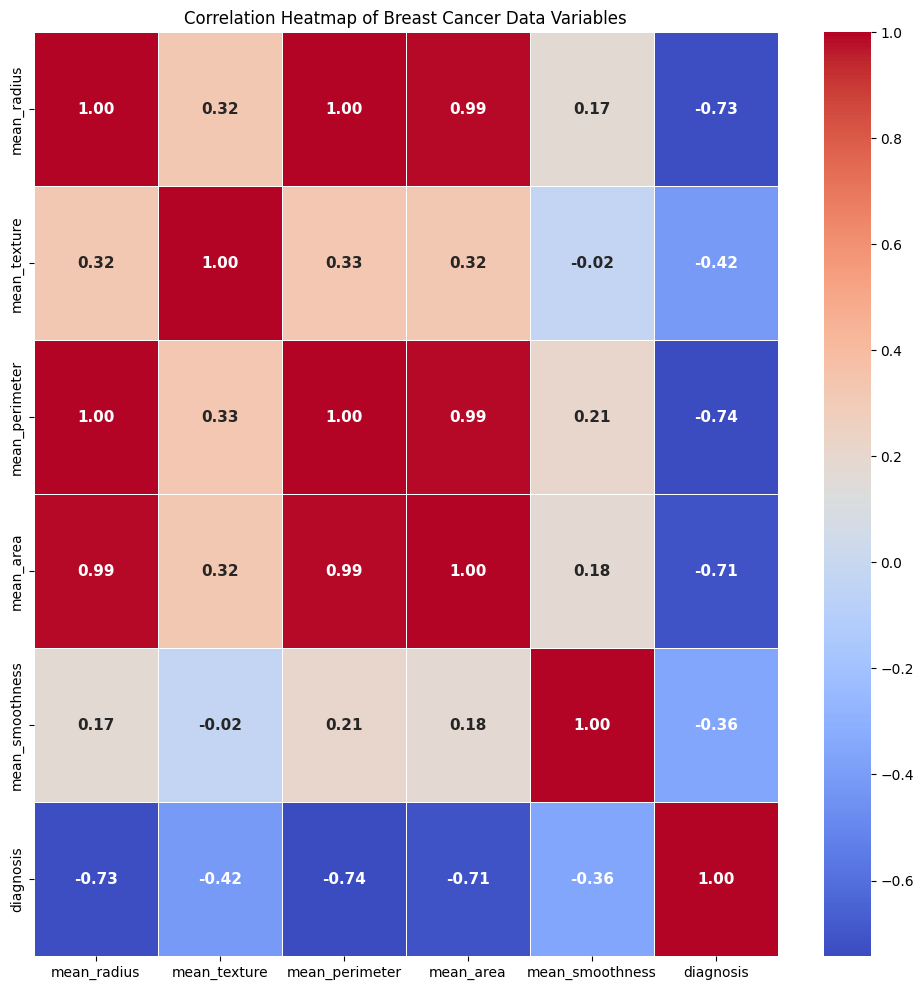

In [ ]:
#Calculate the correlation matrix
correlation_matrix= df.corr()

#Setting up the matplotlib figure
plt.figure(figsize=(12,12))

#Creating a heatmap
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', fmt=".2f", linewidths=.5,  annot_kws={'fontsize':11, 'fontweight':'bold'})
# Set the title of the heatmap
plt.title("Correlation Heatmap of Breast Cancer Data Variables")

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix =df.corr()

# Extract the correlation of 'target' with other variables
diagnosis_correlation = correlation_matrix['diagnosis'].drop('diagnosis').sort_values()

# Display the correlation in ascending order
print("Correlation of 'diagnosis' with other variables (in ascending order):")
print(diagnosis_correlation)

Correlation of 'diagnosis' with other variables (in ascending order):
mean_perimeter    -0.742636
mean_radius       -0.730029
mean_area         -0.708984
mean_texture      -0.415185
mean_smoothness   -0.358560
Name: diagnosis, dtype: float64


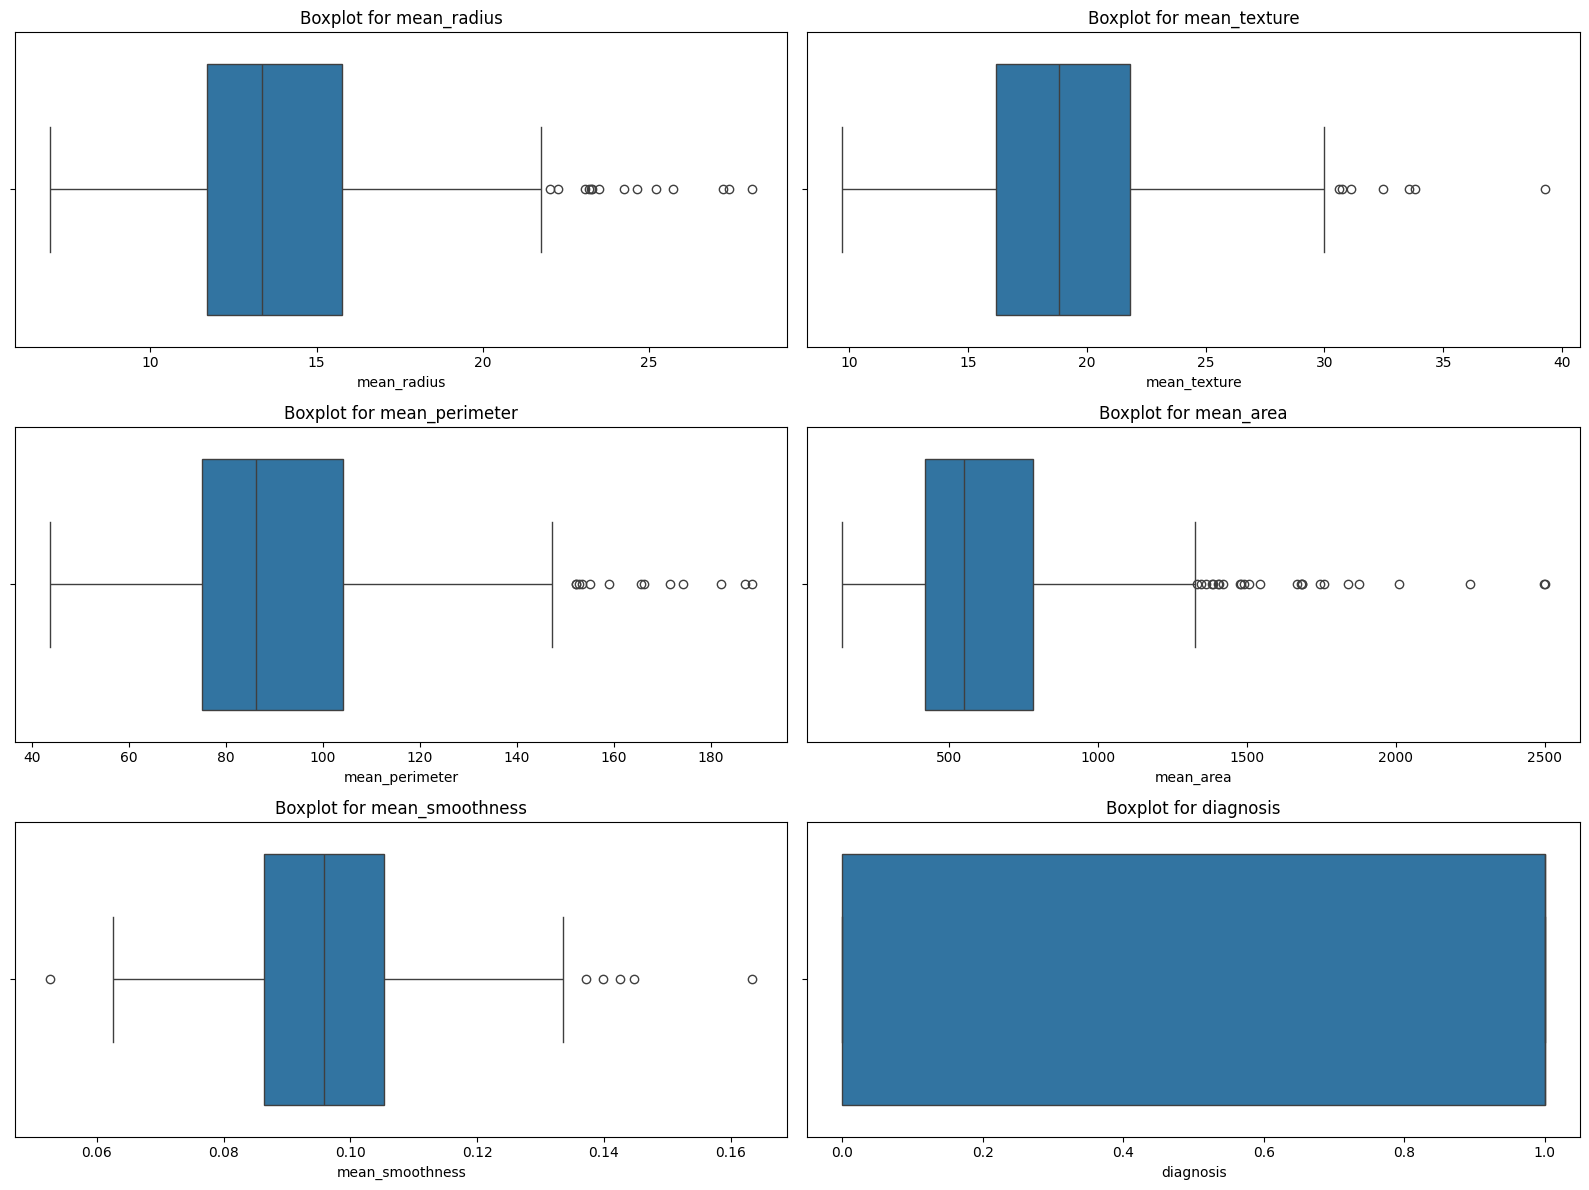

In [ ]:
#Boxplot to check outlier in each category

#List of column names to create boxplots
columns_to_bplot=df.columns

#Setup Matplotlib figure
plt.figure(figsize=(16,12))

#Iterate through each variable
for i, column in enumerate(columns_to_bplot):
    plt.subplot(3, 2, i+1)  # Adjust the subplot layout based on the number of variables
    sns.boxplot(x=column, data=df)
    plt.title(f"Boxplot for {column}")

# Adjust the overall layout
plt.tight_layout()

# Show the plot
plt.show()

#ML Models


In [ ]:
#Outliers
#Create empty list to store results
outliers_percentage = []

#Loop through each column in the dataframe
for column in df.columns:
  if df[column].dtype not in ['int64', 'float64']:
    continue

  #calculate the IQR for the column
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  #Calculate the lower and upper bounds for outliers
  lower_bound= Q1-1.5*IQR
  upper_bound= Q3+1.5*IQR

  #Identify the outliers for current column
  outliers= df[(df[column]<lower_bound) | (df[column]>upper_bound)]

  #Calculate percentage of outliers for the current column
  percentage_outliers= (len(outliers)/len(df[column]))*100

  #Append the result to the outliers_percentage list
  outliers_percentage.append({'Variable': column, 'Percentage of Outliers': percentage_outliers})

  #Create a dataframe from the list of results
  outliers_percentage_df= pd.DataFrame(outliers_percentage)

#Display the dataframe
print(outliers_percentage_df)


          Variable  Percentage of Outliers
0      mean_radius                2.460457
1     mean_texture                1.230228
2   mean_perimeter                2.284710
3        mean_area                4.393673
4  mean_smoothness                1.054482
5        diagnosis                0.000000


In [ ]:
X=df.drop(columns='diagnosis', axis=1)
Y=df['diagnosis']

In [ ]:
X.shape

(569, 5)

In [ ]:
Y.shape

(569,)

In [ ]:
#Splitting the Data into Training and Testing Data
X_train, X_test, y_train,y_test =train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [ ]:
#Using Standardization to scale the dataset due to presence of outliers and for KNN
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X.shape, X_train.shape, X_test.shape

((569, 5), (455, 5), (114, 5))

In [ ]:
Y.shape, y_train.shape, y_test.shape

((569,), (455,), (114,))

**Train and Evaluate ML Model**

In [ ]:
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Predictions
y_pred= rf_model.predict(X_test)

In [ ]:
#Model evaluation
print("Classification report: \n", classification_report(y_test,y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC-ROC Score: 0.943452380952381


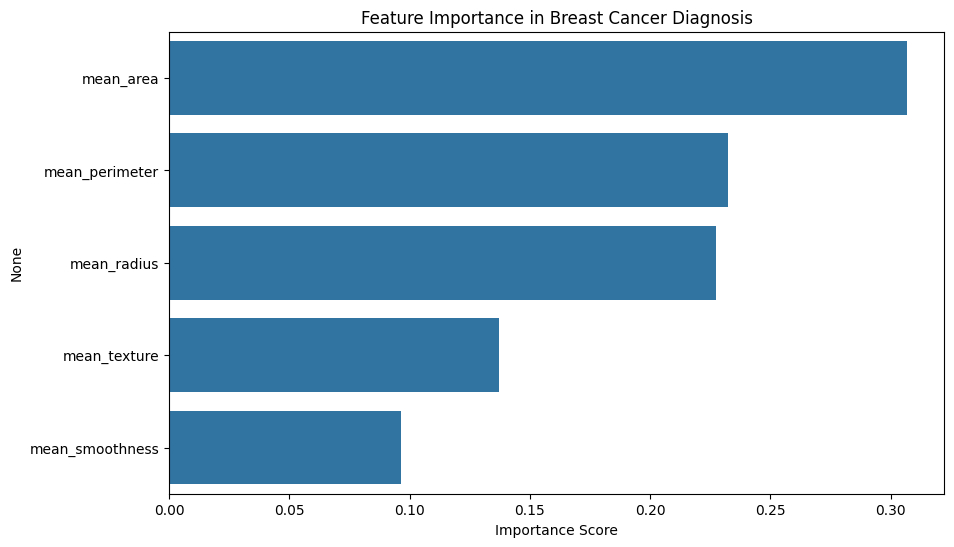

In [ ]:
#identify feature importance

feature_importance = rf_model.feature_importances_
features = X.columns

# Sort and visualize top features
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance in Breast Cancer Diagnosis")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
# Addressing class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


# Print original class distribution
print("Class distribution:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy=0.7)

# SMOTE resampling method
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("New class distribution:", Counter(y_train_resampled))


Class distribution: Counter({1: 285, 0: 170})
New class distribution: Counter({1: 285, 0: 199})


Retrain ML Model


In [ ]:
rf_model_smote= RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
#make prediciton on test set
y_pred_smote= rf_model_smote.predict(X_test)

#evaluate model
print ("Classification report after SMOTE: \n", classification_report(y_test, y_pred_smote))
print("AUC-ROC Score after using SMOTE: \n", roc_auc_score(y_test, y_pred_smote))

Classification report after SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

AUC-ROC Score after using SMOTE: 
 0.943452380952381


The AUC-ROC score, recall and f1-score did not improve even after reducing SMOTE oversampling ratio.
So, using ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print original class distribution
print("Class distribution:", Counter(y_train))

# Initialize ADASYN
adasyn = ADASYN(random_state=42, sampling_strategy=0.7)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Print new class distribution
print("New class distribution:", Counter(y_train_resampled))


Class distribution: Counter({1: 285, 0: 170})
New class distribution: Counter({1: 285, 0: 194})


**Retrain the model after ADASYN**

In [ ]:
rf_model_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_adasyn.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
#Make predictions
y_pred_adasyn = rf_model_adasyn.predict(X_test)

# Evaluate the model
classification_report_adasyn = classification_report(y_test, y_pred_adasyn)
auc_roc_adasyn = roc_auc_score(y_test, y_pred_adasyn)

# Display results
print("Classification Report After ADASYN:\n", classification_report_adasyn)
print("AUC-ROC Score After ADASYN:", auc_roc_adasyn)

Classification Report After ADASYN:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

AUC-ROC Score After ADASYN: 0.9295634920634921
